<a href="https://colab.research.google.com/github/matthiasplum/CosmicRayML-Masterclass/blob/main/RNN_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.model_selection import train_test_split

In [19]:
# Step 1: Generate Synthetic Data
def generate_waveform(length=1000):
    t = np.linspace(0, 4 * np.pi, length)
    waveform = np.sin(t)
    return waveform

def add_noise(waveform, noise_level=0.5):
    noise = np.random.normal(0, noise_level, waveform.shape)
    return waveform + noise

# Generate clean and noisy waveforms
clean_waveform = generate_waveform()
noisy_waveform = add_noise(clean_waveform)

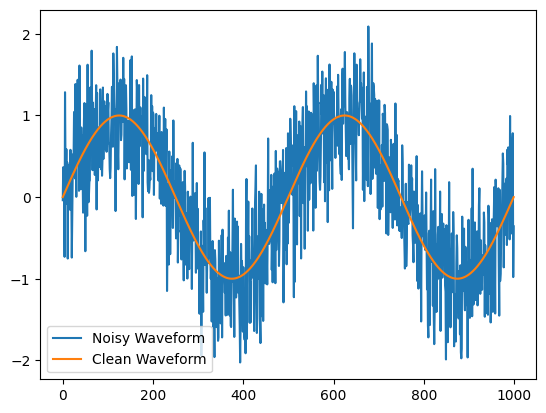

In [20]:
plt.plot(noisy_waveform,label='Noisy Waveform')
plt.plot(clean_waveform,label='Clean Waveform')
plt.legend()

In [21]:
# Step 2: Prepare the Data for the RNN
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
    return np.array(sequences)

seq_length = 50  # Length of the sequence
X = create_sequences(noisy_waveform, seq_length)
y = create_sequences(clean_waveform, seq_length)

In [22]:
# Reshape data to fit RNN input format [samples, time steps, features]
X = X[..., np.newaxis]
y = y[..., np.newaxis]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Step 3: Build and Train the RNN
model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(seq_length, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 50)                2600      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2651 (10.36 KB)
Trainable params: 2651 (10.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
24/24 [==============================] - 2s 22ms/step - loss: 0.1719 - val_loss: 0.0789
Epoch 2/20
24/24 [==============================] - 0s 19ms/step - loss: 0.0608 - val_loss: 0.0559
Epoch 3/20
24/24 [==============================] - 0s 19ms/step - loss: 0.0510 - val_loss: 0.0505
Epoch 4/20
24/24 [==============================] - 1s 21ms/step - loss: 0.0469 - val_loss: 0.0440
Epoch 5/20
24/24 [==

In [24]:
# Step 4: Evaluate and Visualize the Results
# Generate clean and noisy test waveforms
clean_test_waveform = generate_waveform()
noisy_test_waveform = add_noise(clean_test_waveform)
X_testwaveform = create_sequences(noisy_test_waveform, seq_length)
X_testwaveform= X_testwaveform[..., np.newaxis]

cleaned_test_waveform = model.predict(X_testwaveform)

# Flatten the cleaned waveform
cleaned_test_waveform = cleaned_test_waveform.flatten()

30/30 [==============================] - 0s 4ms/step


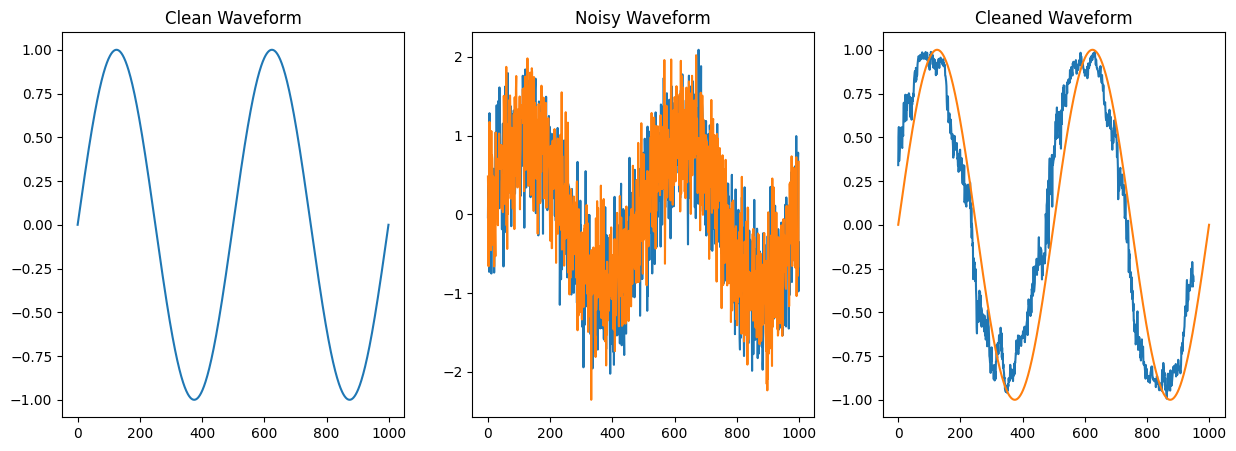

In [25]:
# Plotting the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(clean_waveform, label='Clean Waveform')
plt.title('Clean Waveform')

plt.subplot(1, 3, 2)
plt.plot(noisy_waveform, label='Noisy Waveform')
plt.plot(noisy_test_waveform, label='noisy_test_waveform Waveform')
plt.title('Noisy Waveform')

plt.subplot(1, 3, 3)
plt.plot(cleaned_test_waveform, label='Cleaned Test Waveform')
plt.plot(clean_test_waveform, label='Clean Test Waveform')
plt.title('Cleaned Waveform')

plt.show()